<a href="https://colab.research.google.com/github/naka-c1024/Iris_Classification_with_TensorFlow/blob/main/TensorFlow%E3%81%AB%E3%82%88%E3%82%8B%E5%AE%9F%E8%A3%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7.2 データやライブラリのダウンロード

In [1]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [3]:
#  iris  # アイリス, アヤメという意味
# dir(iris)
# iris.data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
import tensorflow as tf # 誤植 TensorFlow -> tesorflow
from tensorflow import keras # 誤植 TensorFlow -> tesorflow
print(tf.__version__)
tf.random.set_seed(1)

2.7.0


#7.3 データの分割とニューラルネットワークの設定

##7.3.1 データの分割

In [5]:
import random

In [6]:
random.seed(12345)
Ndata = len(iris.data)  # データの総数を調べている (150個)
print(f"Ndata={Ndata}")
idxr = [k for k in range(Ndata)]
print(idxr)  # 0 から 149 まで順番が正しく出ているかチェック
random.shuffle(idxr)
print(idxr)

Ndata=150
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
[109, 78, 108, 60, 93, 46, 14, 59, 118, 8, 18, 96, 77, 62, 104, 25, 99, 133, 130, 82, 80, 148, 17, 4, 34, 101, 33, 81, 126, 61, 28, 89, 132, 79, 9, 68, 64, 54, 149, 35, 26, 136, 70, 140, 40, 57, 120, 39, 30, 119, 139, 113, 102, 103, 86, 45, 72, 114, 50, 11, 122, 51, 24, 10, 56, 7, 6, 117, 124, 145, 112, 121, 144, 137, 91, 128, 1, 38, 21, 92, 16, 1

In [7]:
Ndata_train=int(Ndata*0.5)  # 分割の割合を指定
print(f"# of training data = {Ndata_train}")
print(f"# of validation data = {Ndata-Ndata_train}")
train_data = iris.data[idxr[:Ndata_train]]  # 訓練データ
train_labels = iris.target[idxr[:Ndata_train]]  # 訓練データの教師ラベル

val_data = iris.data[idxr[Ndata_train:]]  # 検証データ
val_labels = iris.target[idxr[Ndata_train:]]  # 検証データの教師ラベル

# of training data = 75
# of validation data = 75


##7.3.2 ニューラルネットワークの設計

In [8]:
model = keras.Sequential([
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

#7.4 学習

In [9]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # 分類の精度を評価する

In [10]:
training_history = model.fit(train_data, train_labels,
                             validation_data=(val_data, val_labels),
                             epochs=20,
                             batch_size = Ndata_train//10,
                             verbose=1)

Epoch 1/20
11/11 [==============================] - 1s 19ms/step - loss: 1.1983 - accuracy: 0.3333 - val_loss: 1.1078 - val_accuracy: 0.2933
Epoch 2/20
11/11 [==============================] - 0s 5ms/step - loss: 1.0947 - accuracy: 0.3467 - val_loss: 1.0956 - val_accuracy: 0.2933
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 1.1330 - accuracy: 0.3200 - val_loss: 1.0970 - val_accuracy: 0.2933
Epoch 4/20
11/11 [==============================] - 0s 4ms/step - loss: 1.0972 - accuracy: 0.3867 - val_loss: 1.1100 - val_accuracy: 0.2933
Epoch 5/20
11/11 [==============================] - 0s 5ms/step - loss: 1.1048 - accuracy: 0.3467 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 1.1050 - accuracy: 0.3467 - val_loss: 1.0897 - val_accuracy: 0.3067
Epoch 7/20
11/11 [==============================] - 0s 5ms/step - loss: 1.0808 - accuracy: 0.3733 - val_loss: 1.0848 - val_accuracy: 0.2933
Epoch 8/20
11/11 [=

#7.5 結果の評価

In [11]:
import matplotlib.pyplot as plt  # 参考書に無かったので追加

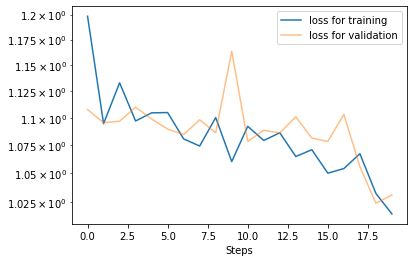

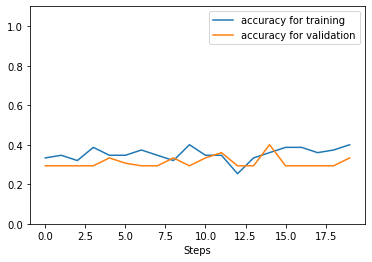

In [12]:
y=training_history.history['loss']
x=range(len(y))
plt.semilogy(x,y,label="loss for training")
#
y=training_history.history['val_loss']
x=range(len(y))
plt.semilogy(x,y,label="loss for validation",alpha=0.5)
#
plt.legend()
plt.xlabel("Steps")
plt.show()
# - - - - -
y=training_history.history['accuracy']
x=range(len(y))
plt.plot(x,y,label="accuracy for training")
y=training_history.history['val_accuracy']
x=range(len(y))
plt.plot(x,y,label="accuracy for validation")
plt.legend()
plt.xlabel("Steps")
plt.ylim(0,1.1)
plt.show()